# Zorluk: Veri Bilimi Hakkında Metin Analizi

> *Bu not defterinde, farklı URL'ler - Makine Öğrenimi üzerine bir Wikipedia makalesi - kullanmayı deniyoruz. Görebileceğiniz gibi, Veri Bilimi'nden farklı olarak, bu makale birçok terim içeriyor ve bu da analizi daha sorunlu hale getiriyor. Anahtar kelime çıkarımı yaptıktan sonra, sık kullanılan ancak anlamlı olmayan kelime kombinasyonlarından kurtulmak için veriyi temizlemenin başka bir yolunu bulmamız gerekiyor.*

Bu örnekte, geleneksel bir veri bilimi sürecinin tüm adımlarını kapsayan basit bir egzersiz yapalım. Herhangi bir kod yazmanıza gerek yok, sadece aşağıdaki hücrelere tıklayarak onları çalıştırabilir ve sonucu gözlemleyebilirsiniz. Bir zorluk olarak, bu kodu farklı verilerle denemeniz teşvik edilmektedir.

## Amaç

Bu derste, Veri Bilimi ile ilgili farklı kavramları tartıştık. Şimdi, **metin madenciliği** yaparak daha fazla ilgili kavram keşfetmeye çalışalım. Veri Bilimi hakkında bir metinle başlayacağız, bu metinden anahtar kelimeler çıkaracağız ve ardından sonucu görselleştirmeye çalışacağız.

Metin olarak, Wikipedia'daki Veri Bilimi sayfasını kullanacağım:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Adım 1: Veriyi Alma

Her veri bilimi sürecindeki ilk adım, veriyi almaktır. Bunu yapmak için `requests` kütüphanesini kullanacağız:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Adım 2: Verilerin Dönüştürülmesi

Bir sonraki adım, verileri işleme uygun bir forma dönüştürmektir. Bizim durumumuzda, sayfadan HTML kaynak kodunu indirdik ve bunu düz metne dönüştürmemiz gerekiyor.

Bunun yapılabileceği birçok yöntem vardır. Biz, Python'daki en basit yerleşik [HTMLParser](https://docs.python.org/3/library/html.parser.html) nesnesini kullanacağız. `HTMLParser` sınıfını alt sınıf olarak tanımlamamız ve `<script>` ve `<style>` etiketleri dışındaki tüm HTML etiketlerinin içindeki metni toplayacak kodu tanımlamamız gerekiyor.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Adım 3: İçgörüler Elde Etme

En önemli adım, verilerimizi içgörüler çıkarabileceğimiz bir forma dönüştürmektir. Bizim durumumuzda, metinden anahtar kelimeleri çıkarmak ve hangi anahtar kelimelerin daha anlamlı olduğunu görmek istiyoruz.

Anahtar kelime çıkarımı için [RAKE](https://github.com/aneesha/RAKE) adlı Python kütüphanesini kullanacağız. Öncelikle, bu kütüphane yüklü değilse yükleyelim:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Ana işlevsellik, bazı parametreler kullanarak özelleştirebileceğimiz `Rake` nesnesinden sağlanır. Bizim durumumuzda, bir anahtar kelimenin minimum uzunluğunu 5 karakter, bir anahtar kelimenin belgede minimum sıklığını 3 ve bir anahtar kelimedeki maksimum kelime sayısını 2 olarak ayarlayacağız. Diğer değerlerle oynamaktan çekinmeyin ve sonucu gözlemleyin.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Önem derecesiyle birlikte bir terimler listesi elde ettik. Gördüğünüz gibi, makine öğrenimi ve büyük veri gibi en ilgili disiplinler listenin üst sıralarında yer alıyor.

## Adım 4: Sonucu Görselleştirme

İnsanlar veriyi en iyi görsel biçimde yorumlayabilir. Bu nedenle, bazı içgörüler elde etmek için veriyi görselleştirmek genellikle mantıklıdır. Python'da `matplotlib` kütüphanesini kullanarak anahtar kelimelerin önem derecesiyle basit bir dağılımını çizebiliriz:


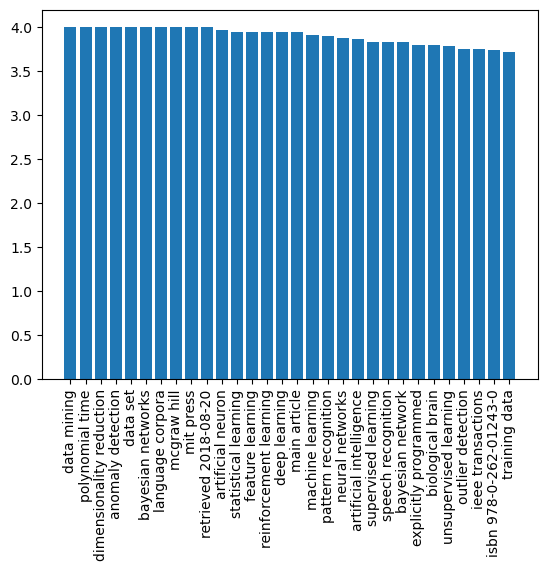

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Bununla birlikte, kelime frekanslarını görselleştirmenin daha iyi bir yolu vardır - **Kelime Bulutu** kullanmak. Anahtar kelime listemizden kelime bulutunu çizmek için başka bir kütüphane yüklememiz gerekecek.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` nesnesi, ya orijinal metni ya da önceden hesaplanmış kelimeler ve frekanslarının listesini alıp, ardından `matplotlib` kullanılarak görüntülenebilecek bir resim döndürmekten sorumludur:


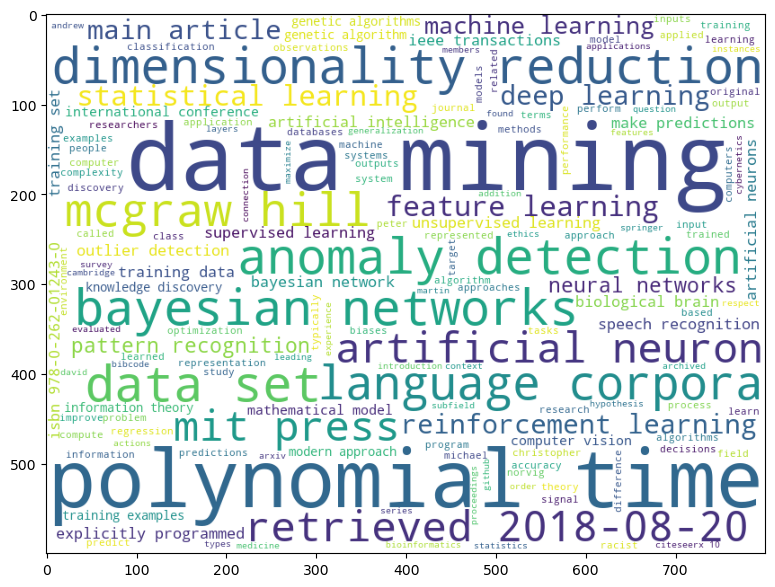

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Orijinal metni de `WordCloud`'a geçirebiliriz - benzer bir sonuç elde edip edemeyeceğimize bakalım:


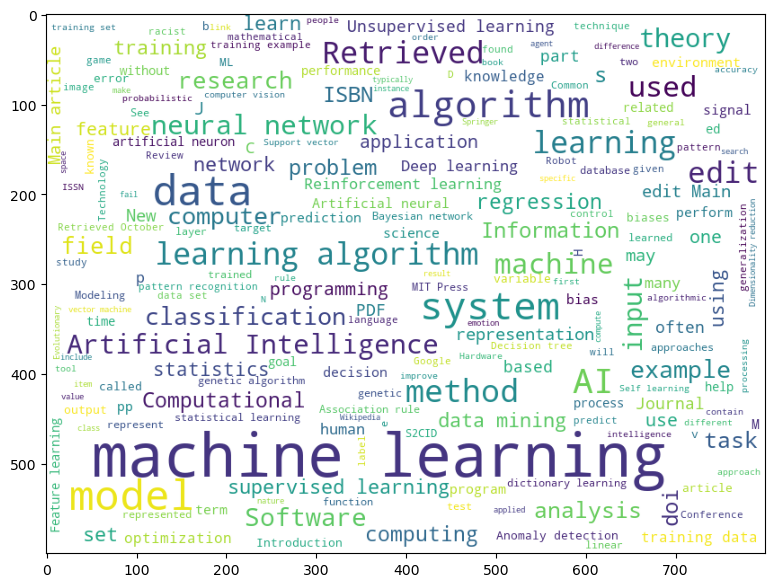

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Kelime bulutu artık daha etkileyici görünüyor, ancak aynı zamanda çok fazla gürültü içeriyor (örneğin, `Retrieved on` gibi alakasız kelimeler). Ayrıca, *data scientist* veya *computer science* gibi iki kelimeden oluşan anahtar kelimeleri daha az elde ediyoruz. Bunun nedeni, RAKE algoritmasının metinden iyi anahtar kelimeler seçmede çok daha başarılı olmasıdır. Bu örnek, veri ön işleme ve temizlemenin önemini göstermektedir, çünkü sonunda net bir tablo, daha iyi kararlar almamızı sağlayacaktır.

Bu alıştırmada, Wikipedia metninden anahtar kelimeler ve kelime bulutu şeklinde bir anlam çıkarmanın basit bir sürecini ele aldık. Bu örnek oldukça basit, ancak bir veri bilimcinin veriyle çalışırken izlediği tipik adımları iyi bir şekilde göstermektedir; veri ediniminden görselleştirmeye kadar.

Kursumuzda bu adımların hepsini detaylı bir şekilde tartışacağız.



---

**Feragatname**:  
Bu belge, [Co-op Translator](https://github.com/Azure/co-op-translator) adlı bir yapay zeka çeviri hizmeti kullanılarak çevrilmiştir. Doğruluk için çaba göstersek de, otomatik çevirilerin hata veya yanlışlıklar içerebileceğini lütfen unutmayın. Belgenin orijinal dili, yetkili kaynak olarak kabul edilmelidir. Kritik bilgiler için profesyonel bir insan çevirisi önerilir. Bu çevirinin kullanımından kaynaklanan yanlış anlama veya yanlış yorumlamalardan sorumlu değiliz.
